In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Parsed from BrownianMotionParse

In [7]:
sum(sqrt(data[:,3]**2+data[:,4]**2))

0.0021986632095300665

In [35]:
data = np.genfromtxt("data/data.txt",delimiter=',',dtype=None)
lhs = mean(data[:,7])
print "LHS: ", lhs
d = 3 #dimensions
D = 1.8256e-12 #experimental
tau = 0.1 #time interval[s]
rhs= 2*D*d*tau
print "RHS: ", rhs
print abs(rhs-lhs)/lhs*100

LHS:  7.96704734027e-12
RHS:  1.09536e-12
86.251368252


In [11]:
lhs/D/d/tau

13.644073400936724

In [12]:
abs(rhs-lhs)/lhs*100

85.341620927789137

In [14]:
shape(data)

(2845, 8)

In [34]:
data = np.genfromtxt("data/data2.txt",delimiter=',',dtype=None)
lhs = mean(data[:,7])
print "LHS: ", lhs
d = 3 #dimensions
D = 1.1515e-12 #experimental
tau = 0.1 #time interval[s]
rhs= 2*D*d*tau
print "RHS: ", rhs
print abs(rhs-lhs)/lhs*100

LHS:  7.94089938105e-12
RHS:  6.909e-13
91.2994741925


In [19]:
def estimated_autocorrelation(x):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

In [20]:
shape(data[:,0])

(2845,)

In [22]:
corr = estimated_autocorrelation(data[:,0])

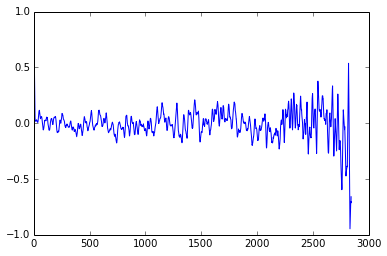

In [23]:
plt.plot(corr)

In [24]:
mean(corr)

-0.007921119959863724

In [26]:
std(corr)

0.12525505142520824

In [36]:
onion_velocity_all= np.genfromtxt("data/onion_velocity_all.txt",delimiter=',',dtype=None)
onion_velocity_average_insta_all= np.genfromtxt("data/onion_velocity_average_instantaneous_all.txt",delimiter=',',dtype=None)

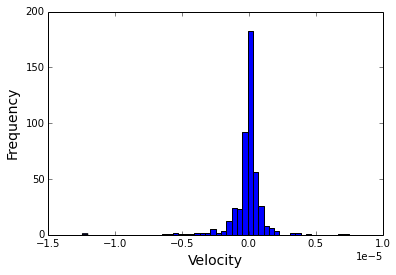

In [66]:
hist1 = plt.hist(onion_velocity_all,50)
plt.xlabel("Velocity",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Fitted mean =  5.81415891048e-08
Fitted standard deviation =  3.08655825826e-07


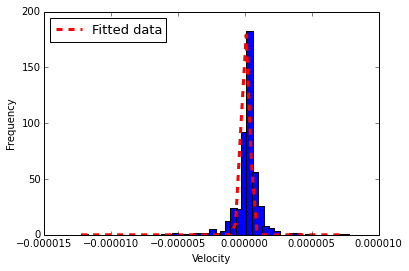

In [81]:
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
data = onion_velocity_all
width=0.5e-6
N, bin_edges = numpy.histogram(data,bins=50)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [100, 0, 0.5e-5]

coeff, var_matrix = curve_fit(gauss, bin_centres, N, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)
plt.plot(bin_centres, hist_fit, '--',color="red",linewidth=3,label='Fitted data')
# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print 'Fitted mean = ', coeff[1]
print 'Fitted standard deviation = ', coeff[2]
from matplotlib.legend_handler import HandlerLine2D
plt.legend(loc='upper left',prop={'size':13},numpoints=1)
plt.bar(bin_centres,N,width=width, color='blue')#, yerr=error)
plt.xlabel("Velocity")
plt.ylabel("Frequency")

plt.show()

Tried fitting a Gaussian but that is not a good fit because the goodness-of-fit chi squared is  1621.833 which is large. 

In [83]:
ymod=   hist_fit
ydata = N
chisq=numpy.sum((ydata-ymod)**2)  
print chisq

1621.83300317


In [48]:
from numpy import inf
onion_velocity_average_insta_all[onion_velocity_average_insta_all == inf] = 0
onion_velocity_average_insta_all = onion_velocity_average_insta_all[numpy.logical_not(numpy.isnan(onion_velocity_average_insta_all))]

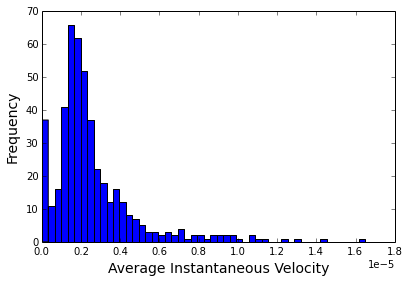

In [63]:
hist2 = plt.hist(onion_velocity_average_insta_all,50)
plt.xlabel("Average Instantaneous Velocity",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

computes the average of the magnitude of the instaneous velcoities of the particles 